In [1]:
%matplotlib inline 
# This turns on inline plotting, where plot graphics will appear in notebook.

In [2]:
from util.devices import find_device
from data_action.transformations import *
from data_action.data_loader import *
from util.image_plot import plot_images
from model.resnet import ResNet18
from learning.train import train
from learning.validate import test
from util.graph_plot import plot_me

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [3]:
device = find_device()
batch_size = 100

data_loader = Data_Loader(device, batch_size)

trainloader = data_loader.load_training_data()
testloader = data_loader.load_testing_data()

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

device: cuda

Loading training data. Dataset: CIFAR10
Files already downloaded and verified
Training data loaded

Loading testing data.
Files already downloaded and verified
Test data loaded



Let us show some of the training images, for fun.



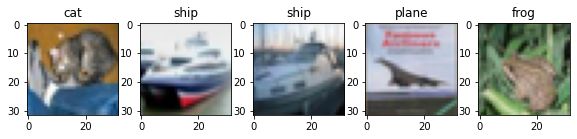

In [4]:

# get some random training images
dataiter = iter(testloader)
images, labels = dataiter.next()

# show images and their labels
plot_images(images, classes, labels)


2. Define a Convolution Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [5]:
net = ResNet18(0.1).to(device)

In [6]:
!pip install torchsummary
from torchsummary import summary

summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
           Dropout-5           [-1, 64, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          36,864
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
        BasicBlock-9           [-1, 64, 32, 32]               0
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
          Dropout-12           [-1, 64, 32, 32]               0
           Conv2d-13           [-1, 64, 32, 32]          36,864
      BatchNorm2d-14           [-1, 64,

3. Define a Loss function and optimizer
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Let's use a Classification Cross-Entropy loss and SGD with momentum.



  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch: 1


loss=1.8797645568847656 batch_id=499: 100%|██████████| 500/500 [01:19<00:00,  6.29it/s]


\Train set: Accuracy: 9718/50000 (19.4360%)



loss=1.7535591125488281 batch_id=0:   0%|          | 1/500 [00:00<01:17,  6.41it/s]


Test set: Average loss: 1.8329, Accuracy: 2796/10000 (27.96%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch: 2


loss=1.6868101358413696 batch_id=499: 100%|██████████| 500/500 [01:19<00:00,  6.32it/s]


\Train set: Accuracy: 16074/50000 (32.1480%)



loss=1.5544527769088745 batch_id=0:   0%|          | 1/500 [00:00<01:19,  6.30it/s]


Test set: Average loss: 1.5863, Accuracy: 4060/10000 (40.60%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch: 3


loss=1.2608824968338013 batch_id=499: 100%|██████████| 500/500 [01:18<00:00,  6.33it/s]


\Train set: Accuracy: 22161/50000 (44.3220%)



loss=1.28737473487854 batch_id=0:   0%|          | 1/500 [00:00<01:20,  6.23it/s]


Test set: Average loss: 1.4517, Accuracy: 4631/10000 (46.31%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch: 4


loss=1.0953574180603027 batch_id=499: 100%|██████████| 500/500 [01:19<00:00,  6.27it/s]


\Train set: Accuracy: 26794/50000 (53.5880%)



loss=1.13066565990448 batch_id=0:   0%|          | 1/500 [00:00<01:21,  6.13it/s]


Test set: Average loss: 1.1984, Accuracy: 5671/10000 (56.71%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch: 5


loss=1.125117540359497 batch_id=499: 100%|██████████| 500/500 [01:19<00:00,  6.28it/s]


\Train set: Accuracy: 30124/50000 (60.2480%)



loss=0.846863865852356 batch_id=0:   0%|          | 1/500 [00:00<01:18,  6.39it/s]


Test set: Average loss: 1.0404, Accuracy: 6357/10000 (63.57%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch: 6


loss=1.100196361541748 batch_id=499: 100%|██████████| 500/500 [01:19<00:00,  6.28it/s]


\Train set: Accuracy: 32398/50000 (64.7960%)



loss=0.8311767578125 batch_id=0:   0%|          | 1/500 [00:00<01:19,  6.31it/s]


Test set: Average loss: 0.9841, Accuracy: 6493/10000 (64.93%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch: 7


loss=0.7855886220932007 batch_id=499: 100%|██████████| 500/500 [01:19<00:00,  6.29it/s]


\Train set: Accuracy: 34465/50000 (68.9300%)



loss=0.5819271802902222 batch_id=0:   0%|          | 1/500 [00:00<01:18,  6.37it/s]


Test set: Average loss: 0.8022, Accuracy: 7194/10000 (71.94%)

Adjusting learning rate of group 0 to 2.0000e-01.
Epoch: 8


loss=0.7078675627708435 batch_id=499: 100%|██████████| 500/500 [01:19<00:00,  6.32it/s]


\Train set: Accuracy: 36287/50000 (72.5740%)



loss=0.7600561380386353 batch_id=0:   0%|          | 1/500 [00:00<01:17,  6.40it/s]


Test set: Average loss: 0.8060, Accuracy: 7171/10000 (71.71%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 9


loss=0.6591516733169556 batch_id=499: 100%|██████████| 500/500 [01:19<00:00,  6.31it/s]


\Train set: Accuracy: 38637/50000 (77.2740%)



loss=0.4718431234359741 batch_id=0:   0%|          | 1/500 [00:00<01:19,  6.25it/s]


Test set: Average loss: 0.6754, Accuracy: 7661/10000 (76.61%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 10


loss=0.6284772753715515 batch_id=499: 100%|██████████| 500/500 [01:19<00:00,  6.30it/s]


\Train set: Accuracy: 39625/50000 (79.2500%)



loss=0.677914023399353 batch_id=0:   0%|          | 1/500 [00:00<01:21,  6.11it/s]


Test set: Average loss: 0.6730, Accuracy: 7704/10000 (77.04%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 11


loss=0.5149726271629333 batch_id=499: 100%|██████████| 500/500 [01:19<00:00,  6.31it/s]


\Train set: Accuracy: 40484/50000 (80.9680%)



loss=0.43912869691848755 batch_id=0:   0%|          | 1/500 [00:00<01:17,  6.44it/s]


Test set: Average loss: 0.5987, Accuracy: 7955/10000 (79.55%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 12


loss=0.3711608648300171 batch_id=499: 100%|██████████| 500/500 [01:19<00:00,  6.30it/s]


\Train set: Accuracy: 41212/50000 (82.4240%)



loss=0.5143480896949768 batch_id=0:   0%|          | 1/500 [00:00<01:18,  6.39it/s]


Test set: Average loss: 0.6087, Accuracy: 7943/10000 (79.43%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 13


loss=0.31961846351623535 batch_id=499: 100%|██████████| 500/500 [01:19<00:00,  6.30it/s]


\Train set: Accuracy: 41787/50000 (83.5740%)



loss=0.5896493792533875 batch_id=0:   0%|          | 1/500 [00:00<01:18,  6.37it/s]


Test set: Average loss: 0.5500, Accuracy: 8152/10000 (81.52%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 14


loss=0.4913412034511566 batch_id=499: 100%|██████████| 500/500 [01:19<00:00,  6.31it/s]


\Train set: Accuracy: 42346/50000 (84.6920%)



loss=0.3985948860645294 batch_id=0:   0%|          | 1/500 [00:00<01:18,  6.33it/s]


Test set: Average loss: 0.5539, Accuracy: 8163/10000 (81.63%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 15


loss=0.27030542492866516 batch_id=499: 100%|██████████| 500/500 [01:19<00:00,  6.31it/s]


\Train set: Accuracy: 43039/50000 (86.0780%)



loss=0.4408813714981079 batch_id=0:   0%|          | 1/500 [00:00<01:18,  6.32it/s]


Test set: Average loss: 0.5343, Accuracy: 8292/10000 (82.92%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch: 16


loss=0.6073125004768372 batch_id=499: 100%|██████████| 500/500 [01:19<00:00,  6.32it/s]


\Train set: Accuracy: 43548/50000 (87.0960%)



loss=0.30413782596588135 batch_id=0:   0%|          | 1/500 [00:00<01:19,  6.30it/s]


Test set: Average loss: 0.4977, Accuracy: 8350/10000 (83.50%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch: 17


loss=0.30614739656448364 batch_id=499: 100%|██████████| 500/500 [01:19<00:00,  6.30it/s]


\Train set: Accuracy: 45192/50000 (90.3840%)



loss=0.2663145959377289 batch_id=0:   0%|          | 1/500 [00:00<01:19,  6.24it/s]


Test set: Average loss: 0.5092, Accuracy: 8409/10000 (84.09%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch: 18


loss=0.2397826910018921 batch_id=499: 100%|██████████| 500/500 [01:19<00:00,  6.30it/s]


\Train set: Accuracy: 45629/50000 (91.2580%)



loss=0.25081244111061096 batch_id=0:   0%|          | 1/500 [00:00<01:19,  6.29it/s]


Test set: Average loss: 0.5003, Accuracy: 8483/10000 (84.83%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch: 19


loss=0.3305661678314209 batch_id=499: 100%|██████████| 500/500 [01:19<00:00,  6.32it/s]


\Train set: Accuracy: 45887/50000 (91.7740%)



loss=0.22947923839092255 batch_id=0:   0%|          | 1/500 [00:00<01:17,  6.41it/s]


Test set: Average loss: 0.5324, Accuracy: 8428/10000 (84.28%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch: 20


loss=0.2142573595046997 batch_id=499: 100%|██████████| 500/500 [01:19<00:00,  6.30it/s]


\Train set: Accuracy: 46243/50000 (92.4860%)



loss=0.16000597178936005 batch_id=0:   0%|          | 1/500 [00:00<01:21,  6.15it/s]


Test set: Average loss: 0.5223, Accuracy: 8482/10000 (84.82%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch: 21


loss=0.1552008092403412 batch_id=499: 100%|██████████| 500/500 [01:19<00:00,  6.26it/s]


\Train set: Accuracy: 46575/50000 (93.1500%)



loss=0.11935503780841827 batch_id=0:   0%|          | 1/500 [00:00<01:18,  6.37it/s]


Test set: Average loss: 0.5083, Accuracy: 8508/10000 (85.08%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch: 22


loss=0.3062842786312103 batch_id=499: 100%|██████████| 500/500 [01:19<00:00,  6.28it/s]


\Train set: Accuracy: 46739/50000 (93.4780%)



loss=0.21821105480194092 batch_id=0:   0%|          | 1/500 [00:00<01:18,  6.32it/s]


Test set: Average loss: 0.5277, Accuracy: 8480/10000 (84.80%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch: 23


loss=0.2203175127506256 batch_id=499: 100%|██████████| 500/500 [01:19<00:00,  6.28it/s]


\Train set: Accuracy: 46916/50000 (93.8320%)



loss=0.1597224622964859 batch_id=0:   0%|          | 1/500 [00:00<01:21,  6.11it/s]


Test set: Average loss: 0.5492, Accuracy: 8469/10000 (84.69%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch: 24


loss=0.14912563562393188 batch_id=499: 100%|██████████| 500/500 [01:19<00:00,  6.26it/s]


\Train set: Accuracy: 47154/50000 (94.3080%)



loss=0.21406781673431396 batch_id=0:   0%|          | 1/500 [00:00<01:19,  6.26it/s]


Test set: Average loss: 0.5501, Accuracy: 8509/10000 (85.09%)

Adjusting learning rate of group 0 to 2.5000e-02.
Epoch: 25


loss=0.17783476412296295 batch_id=499: 100%|██████████| 500/500 [01:20<00:00,  6.25it/s]


\Train set: Accuracy: 48070/50000 (96.1400%)



loss=0.07751662284135818 batch_id=0:   0%|          | 1/500 [00:00<01:21,  6.12it/s]


Test set: Average loss: 0.5280, Accuracy: 8639/10000 (86.39%)

Adjusting learning rate of group 0 to 2.5000e-02.
Epoch: 26


loss=0.06520222872495651 batch_id=499: 100%|██████████| 500/500 [01:19<00:00,  6.27it/s]


\Train set: Accuracy: 48243/50000 (96.4860%)



loss=0.10936208069324493 batch_id=0:   0%|          | 1/500 [00:00<01:19,  6.31it/s]


Test set: Average loss: 0.5570, Accuracy: 8597/10000 (85.97%)

Adjusting learning rate of group 0 to 2.5000e-02.
Epoch: 27


loss=0.09622393548488617 batch_id=499: 100%|██████████| 500/500 [01:19<00:00,  6.30it/s]


\Train set: Accuracy: 48457/50000 (96.9140%)



loss=0.08915426582098007 batch_id=0:   0%|          | 1/500 [00:00<01:18,  6.38it/s]


Test set: Average loss: 0.5773, Accuracy: 8634/10000 (86.34%)

Adjusting learning rate of group 0 to 2.5000e-02.
Epoch: 28


loss=0.10910079628229141 batch_id=499: 100%|██████████| 500/500 [01:19<00:00,  6.29it/s]


\Train set: Accuracy: 48579/50000 (97.1580%)



loss=0.06301543116569519 batch_id=0:   0%|          | 1/500 [00:00<01:19,  6.29it/s]


Test set: Average loss: 0.5641, Accuracy: 8651/10000 (86.51%)

Adjusting learning rate of group 0 to 2.5000e-02.
Epoch: 29


loss=0.06563731282949448 batch_id=499: 100%|██████████| 500/500 [01:19<00:00,  6.29it/s]


\Train set: Accuracy: 48648/50000 (97.2960%)



loss=0.15952765941619873 batch_id=0:   0%|          | 1/500 [00:00<01:21,  6.15it/s]


Test set: Average loss: 0.5816, Accuracy: 8643/10000 (86.43%)

Adjusting learning rate of group 0 to 2.5000e-02.
Epoch: 30


loss=0.04464852809906006 batch_id=499: 100%|██████████| 500/500 [01:19<00:00,  6.30it/s]


\Train set: Accuracy: 48637/50000 (97.2740%)



loss=0.05063336715102196 batch_id=0:   0%|          | 1/500 [00:00<01:19,  6.25it/s]


Test set: Average loss: 0.6022, Accuracy: 8645/10000 (86.45%)

Adjusting learning rate of group 0 to 2.5000e-02.
Epoch: 31


loss=0.11768923699855804 batch_id=499: 100%|██████████| 500/500 [01:19<00:00,  6.29it/s]


\Train set: Accuracy: 48705/50000 (97.4100%)



loss=0.08450912684202194 batch_id=0:   0%|          | 1/500 [00:00<01:18,  6.32it/s]


Test set: Average loss: 0.5971, Accuracy: 8611/10000 (86.11%)

Adjusting learning rate of group 0 to 2.5000e-02.
Epoch: 32


loss=0.09190492331981659 batch_id=499: 100%|██████████| 500/500 [01:19<00:00,  6.26it/s]


\Train set: Accuracy: 48834/50000 (97.6680%)



loss=0.0877150371670723 batch_id=0:   0%|          | 1/500 [00:00<01:19,  6.31it/s]


Test set: Average loss: 0.6061, Accuracy: 8613/10000 (86.13%)

Adjusting learning rate of group 0 to 1.2500e-02.
Epoch: 33


loss=0.05340470373630524 batch_id=499: 100%|██████████| 500/500 [01:20<00:00,  6.21it/s]


\Train set: Accuracy: 49099/50000 (98.1980%)



loss=0.05337022244930267 batch_id=0:   0%|          | 1/500 [00:00<01:19,  6.30it/s]


Test set: Average loss: 0.6009, Accuracy: 8641/10000 (86.41%)

Adjusting learning rate of group 0 to 1.2500e-02.
Epoch: 34


loss=0.04258475825190544 batch_id=499: 100%|██████████| 500/500 [01:20<00:00,  6.21it/s]


\Train set: Accuracy: 49225/50000 (98.4500%)



loss=0.04979986697435379 batch_id=0:   0%|          | 1/500 [00:00<01:20,  6.22it/s]


Test set: Average loss: 0.6086, Accuracy: 8679/10000 (86.79%)

Adjusting learning rate of group 0 to 1.2500e-02.
Epoch: 35


loss=0.052336715161800385 batch_id=499: 100%|██████████| 500/500 [01:20<00:00,  6.24it/s]


\Train set: Accuracy: 49255/50000 (98.5100%)


Test set: Average loss: 0.6107, Accuracy: 8671/10000 (86.71%)

Adjusting learning rate of group 0 to 1.2500e-02.


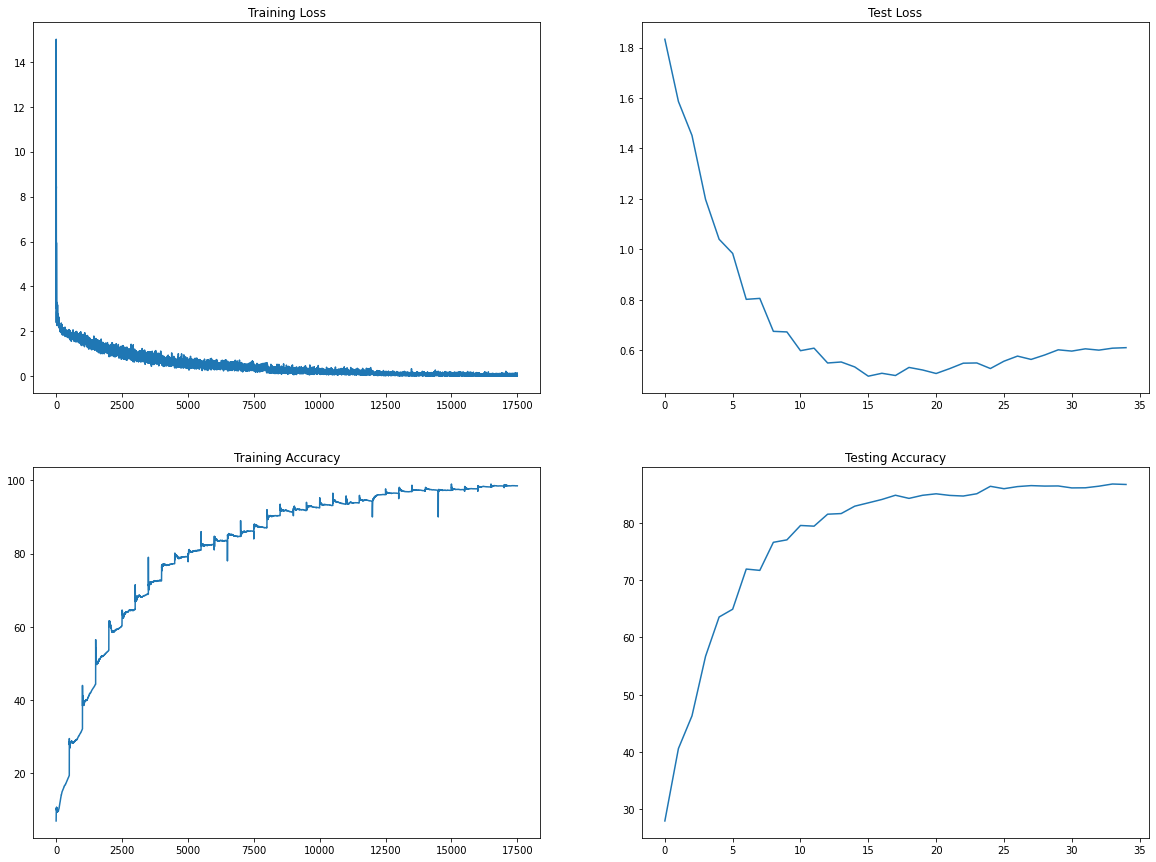

In [7]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau

train_loss = [] 
train_accuracy = []
test_loss = []
test_accuracy = []

optimizer = optim.SGD(net.parameters(), lr=0.2, momentum=0.9)
scheduler = StepLR(optimizer, step_size= 8, gamma= 0.5, verbose = True)

for epoch in range(35):  # loop over the dataset multiple times
    print(f'Epoch: {epoch+1}')
    train(net, device, trainloader, train_loss, train_accuracy, optimizer)
    test(net, device, testloader, test_loss, test_accuracy)
    scheduler.step()

plot_me(train_loss, train_accuracy, test_loss, test_accuracy)


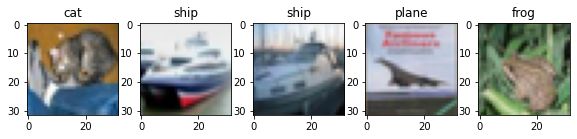

In [8]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
plot_images(images, classes, labels)

In [9]:
outputs = net(images.to(device))

In [10]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


In [11]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 86 %


In [12]:
from util.classwise_performance import clswse_perf

clswse_perf(net, testloader, device, batch_size, classes)

Accuracy of plane : 86 %
Accuracy of   car : 94 %
Accuracy of  bird : 84 %
Accuracy of   cat : 71 %
Accuracy of  deer : 87 %
Accuracy of   dog : 77 %
Accuracy of  frog : 89 %
Accuracy of horse : 91 %
Accuracy of  ship : 94 %
Accuracy of truck : 90 %
